In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing train and test data

train_data = pd.read_csv('Train_Data.csv')
test_data = pd.read_csv('Test_Data.csv')

In [3]:
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [5]:
train_data.shape

(4571, 9)

In [6]:
test_data.shape

(318, 8)

In [ ]:
# train_data.index = [i for i in range(1,train_data.shape[0]+1)]

In [7]:
# Removing strings from columns and converting them to numerical training set

train_data['campaign'] = train_data['campaign'].str.replace('campaign',' ')
train_data['campaign'] = train_data['campaign'].astype(float)

train_data['adgroup'] = train_data['adgroup'].str.replace('adgroup',' ')
train_data['adgroup'] = train_data['adgroup'].astype(float)

train_data['ad'] = train_data['ad'].str.replace('ad',' ')
train_data['ad'] = train_data['ad'].astype(float)

In [8]:
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,1.0,1.0,1.0,24,6,0.08,0,0.00
1,01-08-2020,1.0,2.0,1.0,1,0,0.00,0,0.00
2,01-08-2020,1.0,3.0,1.0,13,4,0.04,0,0.00
3,01-08-2020,1.0,4.0,1.0,5,4,0.08,0,0.00
4,01-08-2020,1.0,1.0,2.0,247,126,1.29,4,925.71


In [9]:
# Removing strings from columns and converting them to numerical test set

test_data['campaign'] = test_data['campaign'].str.replace('campaign',' ')
test_data['campaign'] = test_data['campaign'].astype(float)

test_data['adgroup'] = test_data['adgroup'].str.replace('adgroup',' ')
test_data['adgroup'] = test_data['adgroup'].astype(float)

test_data['ad'] = test_data['ad'].str.replace('ad',' ')
test_data['ad'] = test_data['ad'].astype(float)

In [10]:
train_data.dtypes

date            object
campaign       float64
adgroup        float64
ad             float64
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object

In [11]:
test_data.dtypes

date            object
campaign       float64
adgroup        float64
ad             float64
cost           float64
impressions      int64
clicks           int64
conversions      int64
dtype: object

In [12]:
# Adding some columns as instructed to the train data

train_data['CTR'] = train_data['clicks']/train_data['impressions']
train_data['CPC'] = train_data['cost']/train_data['clicks']
# train_data['CPA'] = train_data['cost']/train_data['conversions']
# train_data['ROI'] = train_data['revenue']/train_data['cost']

In [13]:
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC
0,01-08-2020,1.0,1.0,1.0,24,6,0.08,0,0.00,0.250000,0.013333
1,01-08-2020,1.0,2.0,1.0,1,0,0.00,0,0.00,0.000000,NaN
2,01-08-2020,1.0,3.0,1.0,13,4,0.04,0,0.00,0.307692,0.010000
3,01-08-2020,1.0,4.0,1.0,5,4,0.08,0,0.00,0.800000,0.020000
4,01-08-2020,1.0,1.0,2.0,247,126,1.29,4,925.71,0.510121,0.010238


In [14]:
# Adding some columns as instructed to the test data

test_data['CTR'] = test_data['clicks']/test_data['impressions']
test_data['CPC'] = test_data['cost']/test_data['clicks']
# test_data['CPA'] = test_data['cost']/test_data['conversions']

In [15]:
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR,CPC
0,01-03-2021,1.0,1.0,1.0,0.58,121,49,1,0.404959,0.011837
1,01-03-2021,1.0,3.0,1.0,0.17,22,12,0,0.545455,0.014167
2,01-03-2021,1.0,4.0,1.0,0.05,5,3,0,0.600000,0.016667
3,01-03-2021,1.0,2.0,1.0,0.01,2,1,0,0.500000,0.010000
4,01-03-2021,1.0,2.0,2.0,0.01,3,1,0,0.333333,0.010000


In [16]:
# Including a column with weekday boolean values

train_data['Weekday'] = ((pd.DatetimeIndex(train_data['date']).dayofweek) // 5 == 1).astype(float)

In [17]:
# Including a column with weekday boolean values

test_data['Weekday'] = ((pd.DatetimeIndex(test_data['date']).dayofweek) // 5 == 1).astype(float)

In [18]:
train_data.index = train_data['date']

In [19]:
test_data.index = test_data['date']

In [20]:
train_data.drop('date', axis = 1, inplace = True)
test_data.drop('date', axis = 1, inplace = True)

In [21]:
train_data.dtypes

campaign       float64
adgroup        float64
ad             float64
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
CTR            float64
CPC            float64
Weekday        float64
dtype: object

C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


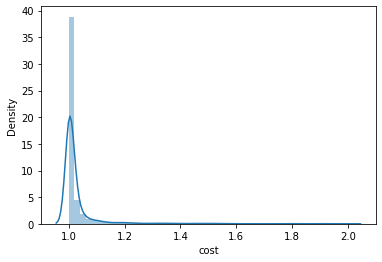

In [76]:
sns.distplot(train_data.cost)

C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


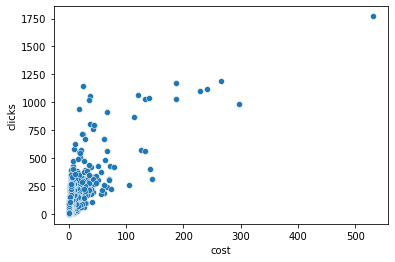

In [23]:
sns.scatterplot(train_data.cost, train_data.clicks)

C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


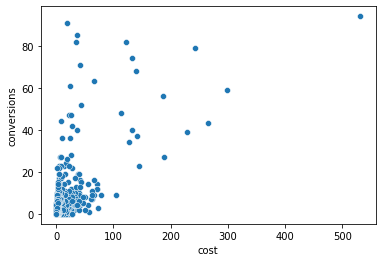

In [24]:
sns.scatterplot(train_data.cost, train_data.conversions)

C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


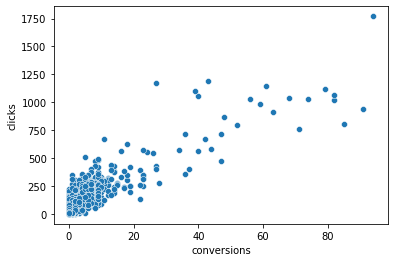

In [25]:
sns.scatterplot(train_data.conversions, train_data.clicks)

C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


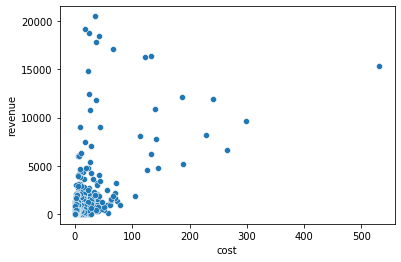

In [26]:
sns.scatterplot(train_data.cost, train_data.revenue)

### Imputation on the columns with missing values

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
train_data.isnull().sum()

campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue          0
CTR              0
CPC            444
Weekday          0
dtype: int64

In [29]:
imputer = SimpleImputer(strategy='mean')
train_data[['CPC']] = imputer.fit_transform(train_data[['CPC']])

In [30]:
train_data.isnull().sum()

campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
CTR            0
CPC            0
Weekday        0
dtype: int64

C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


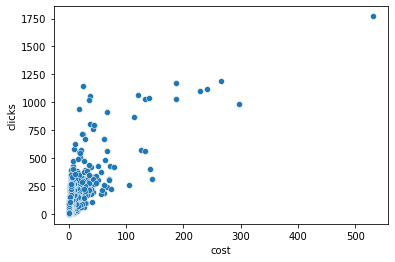

In [31]:
sns.scatterplot(train_data.cost, train_data.clicks)

In [32]:
imputer = SimpleImputer(strategy='mean')
test_data[['CPC']] = imputer.fit_transform(test_data[['CPC']])

In [33]:
train_data.isnull().sum()

campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
CTR            0
CPC            0
Weekday        0
dtype: int64

## Outlier Analysis

In [34]:
# Cost has an outlier
Q1 = np.quantile(train_data['cost'],0.01)
Q3 = np.quantile(train_data['cost'],0.99)
IQR = Q3-Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

In [35]:
list=[]
for i in range(train_data.shape[0]):
    if ((train_data['cost'][i] < lower_range) or (train_data['cost'][i] > upper_range)):
        list.append(train_data['cost'][i])
print(list)

[132.44, 144.97, 141.27, 104.87, 187.83, 228.2, 113.73, 121.52, 186.26, 139.6, 531.25, 265.44, 241.7, 297.96, 126.58, 132.29]


In [36]:
train_data

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,Weekday
date,,,,,,,,,,,
01-08-2020,1.0,1.0,1.0,24,6,0.08,0,0.00,0.250000,0.013333,0.0
01-08-2020,1.0,2.0,1.0,1,0,0.00,0,0.00,0.000000,0.065381,0.0
01-08-2020,1.0,3.0,1.0,13,4,0.04,0,0.00,0.307692,0.010000,0.0
01-08-2020,1.0,4.0,1.0,5,4,0.08,0,0.00,0.800000,0.020000,0.0
01-08-2020,1.0,1.0,2.0,247,126,1.29,4,925.71,0.510121,0.010238,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28-02-2021,1.0,3.0,55.0,19,6,0.07,0,0.00,0.315789,0.011667,1.0
28-02-2021,1.0,4.0,55.0,1,0,0.00,0,0.00,0.000000,0.065381,1.0
28-02-2021,1.0,3.0,56.0,16,8,0.12,1,93.20,0.500000,0.015000,1.0


In [37]:
df2 = train_data[train_data['cost'].isin(list)]
df2

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,Weekday
date,,,,,,,,,,,
08-10-2020,1.0,3.0,28.0,1776,1027,132.44,74,16370.67,0.578266,0.128958,0.0
10-10-2020,1.0,1.0,30.0,758,313,144.97,23,4770.39,0.412929,0.463163,1.0
10-10-2020,1.0,1.0,31.0,1225,398,141.27,37,7742.50,0.324898,0.354950,1.0
11-10-2020,1.0,1.0,2.0,777,263,104.87,9,1848.33,0.338481,0.398745,0.0
25-11-2020,1.0,3.0,42.0,1949,1177,187.83,27,5131.94,0.603899,0.159584,0.0
25-11-2020,1.0,1.0,42.0,2023,1103,228.20,39,8216.89,0.545230,0.206890,0.0
26-11-2020,1.0,3.0,43.0,1435,866,113.73,48,8048.31,0.603484,0.131328,0.0
26-11-2020,1.0,1.0,43.0,2151,1068,121.52,82,16324.10,0.496513,0.113783,0.0
26-11-2020,1.0,1.0,44.0,1895,1031,186.26,56,12089.80,0.544063,0.180660,0.0


In [38]:
train_data.columns

Index(['campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue', 'CTR', 'CPC', 'Weekday'],
      dtype='object')

In [39]:
train_data = train_data[train_data.apply(lambda x: x.values.tolist() not in df2.values.tolist(), axis=1)]

In [40]:
train_data

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,Weekday
date,,,,,,,,,,,
01-08-2020,1.0,1.0,1.0,24,6,0.08,0,0.00,0.250000,0.013333,0.0
01-08-2020,1.0,2.0,1.0,1,0,0.00,0,0.00,0.000000,0.065381,0.0
01-08-2020,1.0,3.0,1.0,13,4,0.04,0,0.00,0.307692,0.010000,0.0
01-08-2020,1.0,4.0,1.0,5,4,0.08,0,0.00,0.800000,0.020000,0.0
01-08-2020,1.0,1.0,2.0,247,126,1.29,4,925.71,0.510121,0.010238,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28-02-2021,1.0,3.0,55.0,19,6,0.07,0,0.00,0.315789,0.011667,1.0
28-02-2021,1.0,4.0,55.0,1,0,0.00,0,0.00,0.000000,0.065381,1.0
28-02-2021,1.0,3.0,56.0,16,8,0.12,1,93.20,0.500000,0.015000,1.0


C:\Users\zigsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


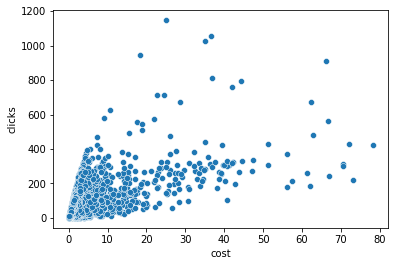

In [41]:
sns.scatterplot(train_data.cost, train_data.clicks)

In [43]:
# import scipy.stats as stat
# import pylab

In [44]:
# def plot_data(df, feature):
#     plt.figure(figsize = (10,6))
#     plt.subplot(1,2,1)
#     df[feature].hist()
#     plt.subplot(1,2,2)
#     stat.probplot(df[feature],dist='norm',plot=pylab)
#     plt.show

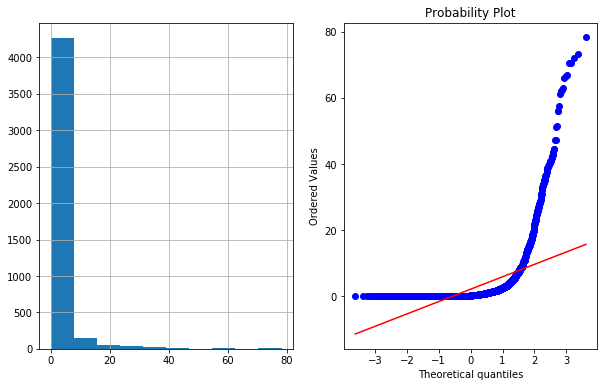

In [45]:
# plot_data(train_data,'cost')

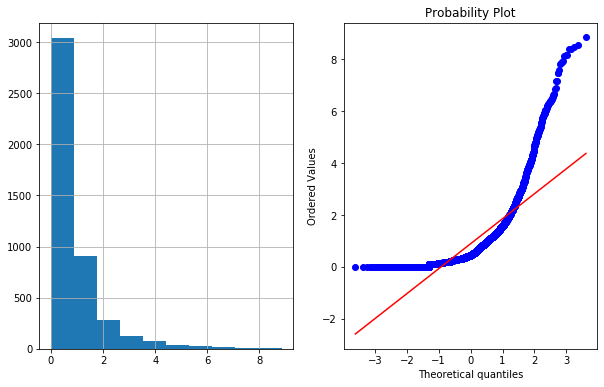

In [46]:
# # sqrt Transform
# df = train_data.copy()
# df['sqrt_cost'] = np.sqrt(df['cost'])
# plot_data(df,'sqrt_cost')

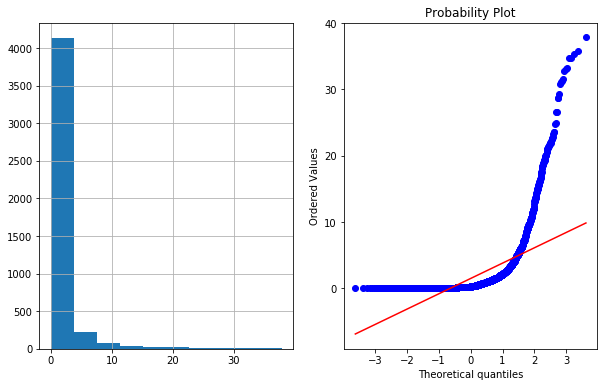

In [47]:
# df['cost_exponential']=df.cost**(1/1.2)
# plot_data(df,'cost_exponential')

In [45]:
df = train_data.copy()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 2))

In [47]:
use_cols = ['cost', 'CTR', 'CPC']

In [48]:
features = df[use_cols]
features.values

array([[0.08      , 0.25      , 0.01333333],
       [0.        , 0.        , 0.06538095],
       [0.04      , 0.30769231, 0.01      ],
       ...,
       [0.12      , 0.5       , 0.015     ],
       [0.23      , 0.35135135, 0.01769231],
       [0.14      , 0.52631579, 0.014     ]])

In [49]:
train_data[use_cols] = scaler.fit_transform(features.values)

C:\Users\zigsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\zigsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
train_data

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,Weekday
date,,,,,,,,,,,
01-08-2020,1.0,1.0,1.0,24,6,1.001022,0,0.00,1.125000,1.000877,0.0
01-08-2020,1.0,2.0,1.0,1,0,1.000000,0,0.00,1.000000,1.014574,0.0
01-08-2020,1.0,3.0,1.0,13,4,1.000511,0,0.00,1.153846,1.000000,0.0
01-08-2020,1.0,4.0,1.0,5,4,1.001022,0,0.00,1.400000,1.002632,0.0
01-08-2020,1.0,1.0,2.0,247,126,1.016477,4,925.71,1.255061,1.000063,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28-02-2021,1.0,3.0,55.0,19,6,1.000894,0,0.00,1.157895,1.000439,1.0
28-02-2021,1.0,4.0,55.0,1,0,1.000000,0,0.00,1.000000,1.014574,1.0
28-02-2021,1.0,3.0,56.0,16,8,1.001533,1,93.20,1.250000,1.001316,1.0


In [51]:
categorical_cols = ['adgroup']

In [52]:
train_data = pd.get_dummies(train_data, columns=['adgroup'])

In [53]:
train_data.shape

(4555, 14)

In [54]:
train_data

,campaign,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,Weekday,adgroup_1.0,adgroup_2.0,adgroup_3.0,adgroup_4.0
date,,,,,,,,,,,,,,
01-08-2020,1.0,1.0,24,6,1.001022,0,0.00,1.125000,1.000877,0.0,1,0,0,0
01-08-2020,1.0,1.0,1,0,1.000000,0,0.00,1.000000,1.014574,0.0,0,1,0,0
01-08-2020,1.0,1.0,13,4,1.000511,0,0.00,1.153846,1.000000,0.0,0,0,1,0
01-08-2020,1.0,1.0,5,4,1.001022,0,0.00,1.400000,1.002632,0.0,0,0,0,1
01-08-2020,1.0,2.0,247,126,1.016477,4,925.71,1.255061,1.000063,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28-02-2021,1.0,55.0,19,6,1.000894,0,0.00,1.157895,1.000439,1.0,0,0,1,0
28-02-2021,1.0,55.0,1,0,1.000000,0,0.00,1.000000,1.014574,1.0,0,0,0,1
28-02-2021,1.0,56.0,16,8,1.001533,1,93.20,1.250000,1.001316,1.0,0,0,1,0


In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [56]:
X = train_data.drop('revenue',axis=1)

In [57]:
X

,campaign,ad,impressions,clicks,cost,conversions,CTR,CPC,Weekday,adgroup_1.0,adgroup_2.0,adgroup_3.0,adgroup_4.0
date,,,,,,,,,,,,,
01-08-2020,1.0,1.0,24,6,1.001022,0,1.125000,1.000877,0.0,1,0,0,0
01-08-2020,1.0,1.0,1,0,1.000000,0,1.000000,1.014574,0.0,0,1,0,0
01-08-2020,1.0,1.0,13,4,1.000511,0,1.153846,1.000000,0.0,0,0,1,0
01-08-2020,1.0,1.0,5,4,1.001022,0,1.400000,1.002632,0.0,0,0,0,1
01-08-2020,1.0,2.0,247,126,1.016477,4,1.255061,1.000063,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28-02-2021,1.0,55.0,19,6,1.000894,0,1.157895,1.000439,1.0,0,0,1,0
28-02-2021,1.0,55.0,1,0,1.000000,0,1.000000,1.014574,1.0,0,0,0,1
28-02-2021,1.0,56.0,16,8,1.001533,1,1.250000,1.001316,1.0,0,0,1,0


In [72]:
# ykeliyedf = pd.read_csv('Train_Data.csv')

In [73]:
# y = ykeliyedf['revenue']

In [74]:
# y

In [61]:
# train_data = train_data[train_data.apply(lambda x: x.values.tolist() not in df2.values.tolist(), axis=1)]
# y = y[y.apply(lambda x: x.values.tolist() not in df2.values.tolist(), axis=1)]

In [62]:
y = train_data['revenue']
y

date
01-08-2020      0.00
01-08-2020      0.00
01-08-2020      0.00
01-08-2020      0.00
01-08-2020    925.71
               ...  
28-02-2021      0.00
28-02-2021      0.00
28-02-2021     93.20
28-02-2021      0.00
28-02-2021      0.00
Name: revenue, Length: 4555, dtype: float64

In [63]:
linreg.fit(X,y)

LinearRegression()

In [64]:
linreg.score(X,y)

0.9306670778446132

In [65]:
test_data

,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR,CPC,Weekday
date,,,,,,,,,,
01-03-2021,1.0,1.0,1.0,0.58,121,49,1,0.404959,0.011837,1.0
01-03-2021,1.0,3.0,1.0,0.17,22,12,0,0.545455,0.014167,1.0
01-03-2021,1.0,4.0,1.0,0.05,5,3,0,0.600000,0.016667,1.0
01-03-2021,1.0,2.0,1.0,0.01,2,1,0,0.500000,0.010000,1.0
01-03-2021,1.0,2.0,2.0,0.01,3,1,0,0.333333,0.010000,1.0
...,...,...,...,...,...,...,...,...,...,...
15-03-2021,1.0,4.0,55.0,0.01,1,1,0,1.000000,0.010000,0.0
15-03-2021,1.0,3.0,55.0,0.01,5,1,0,0.200000,0.010000,0.0
15-03-2021,1.0,1.0,55.0,0.14,25,11,0,0.440000,0.012727,0.0


In [66]:
test_data = pd.get_dummies(test_data, columns=['adgroup'])

In [67]:
train_data.columns

Index(['campaign', 'ad', 'impressions', 'clicks', 'cost', 'conversions',
       'revenue', 'CTR', 'CPC', 'Weekday', 'adgroup_1.0', 'adgroup_2.0',
       'adgroup_3.0', 'adgroup_4.0'],
      dtype='object')

In [68]:
test_data.columns

Index(['campaign', 'ad', 'cost', 'impressions', 'clicks', 'conversions', 'CTR',
       'CPC', 'Weekday', 'adgroup_1.0', 'adgroup_2.0', 'adgroup_3.0',
       'adgroup_4.0'],
      dtype='object')

In [69]:
X_test = test_data
X_test

,campaign,ad,cost,impressions,clicks,conversions,CTR,CPC,Weekday,adgroup_1.0,adgroup_2.0,adgroup_3.0,adgroup_4.0
date,,,,,,,,,,,,,
01-03-2021,1.0,1.0,0.58,121,49,1,0.404959,0.011837,1.0,1,0,0,0
01-03-2021,1.0,1.0,0.17,22,12,0,0.545455,0.014167,1.0,0,0,1,0
01-03-2021,1.0,1.0,0.05,5,3,0,0.600000,0.016667,1.0,0,0,0,1
01-03-2021,1.0,1.0,0.01,2,1,0,0.500000,0.010000,1.0,0,1,0,0
01-03-2021,1.0,2.0,0.01,3,1,0,0.333333,0.010000,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-03-2021,1.0,55.0,0.01,1,1,0,1.000000,0.010000,0.0,0,0,0,1
15-03-2021,1.0,55.0,0.01,5,1,0,0.200000,0.010000,0.0,0,0,1,0
15-03-2021,1.0,55.0,0.14,25,11,0,0.440000,0.012727,0.0,1,0,0,0


In [70]:
target = linreg.predict(X_test)

In [71]:
res = pd.DataFrame(target)
res.columns = ['revenue']
res.index = [i for i in range(1, 319)]
res.to_csv('IITG_Project.csv',index=False)

In [ ]:
#The data consisted of both categorical and continuous variables. I performed different types of imputation based on data. I have also gone out of the box and included a column for weekends and weekdays which might affect the ad clicks (based on common sense) Furthermore, I have done outlier analysis and feature scaling for required columns. Finally, I used linear regression model. Other models might also be used but as revenue is a continuous variable, I found it best according to my understanding. 